In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\project2\data.csv")
data.head

<bound method NDFrame.head of              id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
1          2595                              Skylit Midtown Castle       2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
3          3831                    Cozy Entire Floor of Brownstone       4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099          Large Cozy 1 BR Apartment In Midtown East       7322   
6          5121                                    BlissArtsSpace!       7356   
7          5178                   Large Furnished Room Near B'way        8967   
8          5203                 Cozy Clean Guest Room - Family Apt       7490   
9          5238                 Cute & Cozy Lower East Side 1 bdrm       7549   
10         5295                   Beautiful 1br on Upper West Side       7702  

In [4]:
                
host_counts = data['host_id'].value_counts()
house_host_counts = pd.DataFrame(host_counts)['host_id'].value_counts()
MAX_HOUSE_NUM = 10
house_host_counts

1      32303
2       3329
3        951
4        360
5        169
6         95
7         57
8         52
9         26
10        21
12        15
13        10
11        10
14         5
15         5
17         4
18         3
33         3
23         3
34         2
96         2
31         2
52         2
28         2
49         2
20         2
25         2
37         1
29         1
91         1
65         1
27         1
26         1
121        1
87         1
47         1
21         1
30         1
39         1
103        1
327        1
232        1
19         1
50         1
43         1
16         1
32         1
Name: host_id, dtype: int64

In [6]:
counter = dict()
for i in range(1, MAX_HOUSE_NUM+1):
    counter[i] = 0

for house, hosts in house_host_counts.items():
    if house >= MAX_HOUSE_NUM:
        counter[MAX_HOUSE_NUM] += hosts
    else:
        counter[house] += hosts

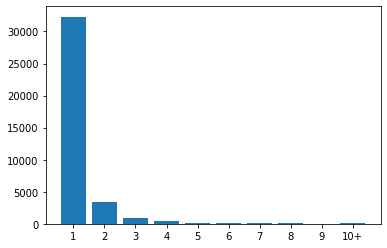

In [7]:
plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(1, MAX_HOUSE_NUM+1)],
           [i for i in range(1, MAX_HOUSE_NUM)] + ['{}+'.format(MAX_HOUSE_NUM)])
plt.show()

In [8]:
airbnb_df = data.loc[data['availability_365'] == 0]

In [9]:
neigh_grp = airbnb_df["neighbourhood_group"]
price = airbnb_df["price"]
neigh = airbnb_df["neighbourhood"]
lat = airbnb_df["latitude"]
long = airbnb_df["longitude"]
df_airbnb_data = pd.DataFrame({"neighbourhood_group" : neigh_grp, "price": price , "neighbourhood" : neigh,"latitude":lat,"longitude":long})
df_airbnb_data.head()

,neighbourhood_group,price,neighbourhood,latitude,longitude
4,Manhattan,80,East Harlem,40.79851,-73.94399
6,Brooklyn,60,Bedford-Stuyvesant,40.68688,-73.95596
8,Manhattan,79,Upper West Side,40.80178,-73.96723
14,Manhattan,120,West Village,40.73530,-74.00525
20,Brooklyn,299,Williamsburg,40.71842,-73.95718


In [10]:
avg_neigh_grp_price = df_airbnb_data.groupby(["neighbourhood_group"]).mean()
df_avg_neigh_grp_price = avg_neigh_grp_price.reset_index()
# Average price of BNB in each neighbourhood group of NYC
df = df_avg_neigh_grp_price.rename(columns = {"neighbourhood_group":"Neighbourhood Group","price":"Average Price"})
df_final_avgprice = df.drop(['latitude', 'longitude'], axis=1)
df_final_avgprice

,Neighbourhood Group,Average Price
0,Bronx,79.694915
1,Brooklyn,111.146099
2,Manhattan,167.879659
3,Queens,97.908626
4,Staten Island,119.404762


In [12]:
average_price_nyc = df_final_avgprice["Average Price"].mean()
price_diff_percent_manhattan = ((df_final_avgprice["Average Price"][2]-average_price_nyc)/average_price_nyc)*100
price_diff_bronx_manha = ((df_final_avgprice["Average Price"][0] - df_final_avgprice["Average Price"][2])/df_final_avgprice["Average Price"][2])*100

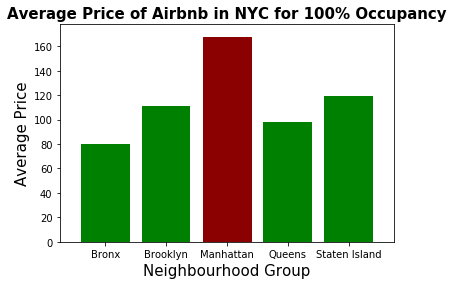

In [13]:
new_price = df_avg_neigh_grp_price["price"]
new_neigh_grp = df_avg_neigh_grp_price["neighbourhood_group"]

# Bar graph to show average prices of each neighbourhood group
x_axis = np.arange(len(new_price))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, new_neigh_grp)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(new_price)+ 10)

plt.title("Average Price of Airbnb in NYC for 100% Occupancy",fontsize = 15, weight = 'bold')
plt.xlabel("Neighbourhood Group", fontsize = 15)
plt.ylabel("Average Price", fontsize = 15)


barplot = plt.bar(x_axis, new_price, color="green", align="center")
barplot[2].set_color('darkred')

plt.savefig("AveragePriceBarChart.png")
plt.show()